In [2]:
#packages
pack = c("matrixStats","tidyquant","tmvtnorm","Matrix","openxlsx","gridExtra","tidyr","reshape2","readxl","dplyr","ggplot2","magrittr","ggpubr")

libraries = pack
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE) }

# Datasets for Dengue outbreak in Japan

In [3]:
filename = "Dengue_Japan2014.xlsx"
sheet.names = c("exact","interval","unknown")

n.sheet = length(sheet.names)
temp=1
for ( i in 1:n.sheet){
  for (j in 1:n.sheet){
    var1 = paste0("T",i,"_",sheet.names[j])
    read_excel(filename, sheet = temp) %>% ncol -> nclmns
    data_ = read_excel(filename, sheet = temp,col_types = c("numeric",rep("date",nclmns-1)))
    data = as.data.frame(cbind(i,sheet.names[j],data_))
    colnames(data)<-c("T","Type",colnames(data)[3:ncol(data)])
    temp = temp+1
    assign(x=var1,value=data)}
}

Case_Group= list()
Case_Group[[1]]<-rbind(T1_exact,T2_exact,T3_exact)
Case_Group[[1]]%<>%mutate(E=as.Date(E),Onset=as.Date(Onset))

Case_Group[[2]]<-rbind(T1_interval,T2_interval,T3_interval)
Case_Group[[2]]%<>%mutate(E_L=as.Date(E_L),E_R=as.Date(E_R),Onset=as.Date(Onset))

Case_Group[[3]]<-rbind(T1_unknown,T2_unknown,T3_unknown)
Case_Group[[3]]%<>%mutate(Onset=as.Date(Onset))

#number of cases by group
ncases_group=sapply(Case_Group,"nrow")
total.cases.nbr=sum(ncases_group)
# The earliest observed date of exposure
exposure.t0 <-as.Date(sort(c(Case_Group[[1]]$E,Case_Group[[2]]$E_R)))[1]
cat("the earliest observed date of exposure: ",as.character(exposure.t0),"\n")
# total number of cases in Group 1, 2, 3
cat("Total number of cases: ",total.cases.nbr,"\n")

the earliest observed date of exposure:  2014-08-04 
Total number of cases:  156 


In [4]:
print("Group 1 cases")
Case_Group[[1]]%>%head(10)
print("Group 2 cases")
Case_Group[[2]]%>%head(10)
print("Group 3 cases")
Case_Group[[3]]%>%head(10)

[1] "Group 1 cases"


T,Type,ID,E,Onset
1,exact,52,2014-08-04,2014-08-12
1,exact,78,2014-08-07,2014-08-12
1,exact,25,2014-08-10,2014-08-14
1,exact,50,2014-08-09,2014-08-14
1,exact,10,2014-08-10,2014-08-17
1,exact,12,2014-08-11,2014-08-18
1,exact,11,2014-08-16,2014-08-21
1,exact,15,2014-08-17,2014-08-22
1,exact,13,2014-08-10,2014-08-23
1,exact,7,2014-08-20,2014-08-24


[1] "Group 2 cases"


T,Type,ID,E_L,E_R,Onset
1,interval,35,2014-08-05,2014-08-13,2014-08-14
1,interval,4,2014-08-09,2014-08-10,2014-08-16
1,interval,16,2014-08-09,2014-08-10,2014-08-16
1,interval,3,2014-08-01,2014-08-17,2014-08-18
1,interval,1,2014-08-11,2014-08-18,2014-08-20
1,interval,19,2014-08-16,2014-08-18,2014-08-23
1,interval,20,2014-08-16,2014-08-18,2014-08-23
1,interval,31,2014-08-16,2014-08-18,2014-08-23
1,interval,71,2014-08-16,2014-08-18,2014-08-23
1,interval,24,2014-08-16,2014-08-17,2014-08-24


[1] "Group 3 cases"


T,Type,ID,Onset
1,unknown,2,2014-08-24
1,unknown,48,2014-08-24
1,unknown,26,2014-08-25
2,unknown,118,2014-08-29
2,unknown,27,2014-08-30
2,unknown,67,2014-08-30
2,unknown,82,2014-08-30
2,unknown,95,2014-08-30
2,unknown,102,2014-08-30
2,unknown,76,2014-08-31


# Figure 1

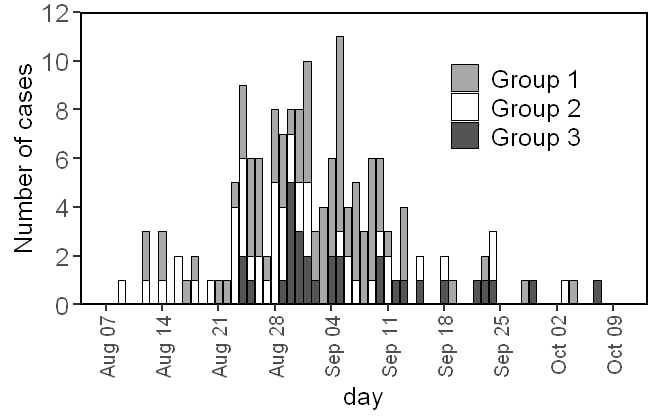

In [5]:
Type123_onset = rbind(Case_Group[[1]]%>%dplyr::select(Type,Onset),Case_Group[[2]]%>%dplyr::select(Type,Onset),Case_Group[[3]]%>%dplyr::select(Type,Onset))
Type123_onset_table = Type123_onset%>%group_by(Type,Onset)%>%summarize(n=n())

options(repr.plot.width=5.5,repr.plot.height=3.5)
Type123=ggplot(Type123_onset_table, aes(x=Onset,y=n,group=Type,fill=Type) ) +
  geom_bar(stat="identity",show.legend = TRUE,colour="black") +
  scale_fill_manual(name="",values=c("gray66","white","gray33"),labels=c("Group 1","Group 2","Group 3"))+
  coord_x_date(xlim=c(as.Date("2014-8-7"),as.Date("2014-10-10")),ylim=c(0,12))+
  scale_y_continuous(expand = c(0,0),breaks=seq(0,12,by=2))+
  scale_x_date(date_breaks="7 day",date_labels="%b %d")+
  labs(x="day",y="Number of cases")+
  theme_bw(base_size=15)+theme(axis.text.x=element_text(size=12,angle = 90, vjust=0.5,hjust = 1),axis.text.y=element_text(size=15),axis.title=element_text(size=15),
                               plot.title = element_text(size = 15,face="bold"),
                               legend.background = element_rect(fill="transparent"), 
                               panel.grid= element_blank(),
                               legend.text=element_text(size=15),
                               legend.position = c(0.9,0.99),
                               panel.border = element_rect(colour = "black", fill=NA, size=1),
                               legend.justification = c("right", "top"))
print(Type123)


# Incubation period by using cases in Group 1

In [6]:
incub= data.frame(days=as.numeric(Case_Group[[1]]$Onset-Case_Group[[1]]$E))
tab.incub<-incub%>%group_by(days)%>%summarize(Freq=n())
tab.incub%>%head

days,Freq
2,1
3,3
4,8
5,18
6,18
7,12


In [7]:
# d0 was varied from 3 to 9 days
d0=8
# day0_exact: initial calendar day
day0_exact=exposure.t0-d0 
# control interventions implemented on "Tdate":
# mosqutio control implented on T1
# park closure implemented on T2
Tdate = c("2014-08-28","2014-09-04")
T1 =as.numeric(as.Date(Tdate[1])-day0_exact)+1 
T2 =as.numeric(as.Date(Tdate[2])-day0_exact)+1 # park closure

#cases in Group 1: case_exact
Case_Group[[1]]%<>%mutate(day_onset=as.numeric(Onset-day0_exact+1))%<>%mutate(day_E=as.numeric(E-day0_exact+1))
#cases in Group 2: case_interval
Case_Group[[2]]%<>%mutate(day_onset=as.numeric(Onset-day0_exact+1))%>%
  mutate(day_EL=as.numeric(E_L-day0_exact+1))%>%
  mutate(day_ER=as.numeric(E_R-day0_exact+1))
#cases in Group 3: case_unknown
Case_Group[[3]]%<>%mutate(day_onset=as.numeric(Onset-day0_exact+1))

# finial time
tfinal = max(c(Case_Group[[1]]$day_onset,Case_Group[[2]]$day_onset,Case_Group[[3]]$day_onset))
date.time<-(day0_exact+c(0:(tfinal-1)))
tt=(1:(tfinal))
cat("Final time: ",tfinal,"(",as.character(date.time[1]),"-",as.character(date.time[tfinal]),")")
(data.frame(time=1:tfinal,date=date.time)%>%head(10))

Final time:  73 ( 2014-07-27 - 2014-10-07 )

time,date
1,2014-07-27
2,2014-07-28
3,2014-07-29
4,2014-07-30
5,2014-07-31
6,2014-08-01
7,2014-08-02
8,2014-08-03
9,2014-08-04
10,2014-08-05


# Probability of observed cases

In [8]:
epicurve_group = list()
observed_cases = data.frame(group1.obs=rep(0,tfinal),group2.obs=0,group3.obs=0)
# number of groups
n_group = ncol(observed_cases)

for (i in 1:n_group){
    epicurve_cases=Case_Group[[i]]%>%arrange(Onset)
    epicurve_group[[i]]<-epicurve_cases%>%group_by(Onset)%>%summarize(Obs=n())
    epicurve_group[[i]]%<>%mutate(day=sort(unique(Case_Group[[i]]$day_onset)))
    observed_cases[epicurve_group[[i]]$day,i] = epicurve_group[[i]]$Obs
}   

observed_cases%<>%mutate(Total=group1.obs+group2.obs+group3.obs)
observed_cases%>%tail(10)

,group1.obs,group2.obs,group3.obs,Total
64,1,0,0,1
65,0,0,1,1
66,0,0,0,0
67,0,0,0,0
68,0,0,0,0
69,0,1,0,1
70,1,0,0,1
71,0,0,0,0
72,0,0,0,0
73,0,0,1,1


# Equation (1) for $g_s$ : the generation time from infection in a human to infection in its secondary case via a mosquito

In [9]:
gam= function(t,para){
  g.mu = para[1]
  g.var = (para[2])^2
  shape1 = g.mu^2/g.var
  scale1 = g.var/g.mu
  gt =  pgamma(t, shape=shape1, scale=scale1)-pgamma((t-1),shape=shape1, scale=scale1)
  return(gt)
}


gs <-function(tt,p.g1,p.g2){
  gt=rep(0,length(tt))
  for (j in 1:length(tt)){
    t=tt[j]
    tau1=(0:t)
    f=(gam(tau1,p.g1)*gam((t-tau1),p.g2))
    gt[j]=sum(f)
  }
  return(gt)
}

# Convoultions of $g_s$ to define $(g*g)_t$

In [10]:
gs_conv2 <-function(tt,p.g1,p.g2){
  gt=rep(0,length(tt))
  for (j in 1:length(tt)){
    t=tt[j]
    tau1=(0:t)
    f=(gs(tau1,p.g1,p.g2)*gs((t-tau1),p.g1,p.g2))
    gt[j]=sum(f)
  }
  return(gt)
}

# Equations (3)-(5) of $h(t)$ and $u(t)$ 

In [11]:
ut_gen2<-function(t,params){
  
    # unknown parameters
      pg1 = params[1:2]
      pg2 = params[3:4]
      Rm = params[5]
      epsils = params[6:7]
    # convolutions of gs
      f1 = gs(t,pg1,pg2)
      f2 = gs_conv2(t,pg1,pg2)
     
    coef = c(1,Rm)
    norm.coef = coef/sum(coef)
    
    # equation (3) : ht
      ht <-(norm.coef[1]*f1+norm.coef[2]*f2)
    
    # equation (4) : epsilon_t 
      epsilon_t = rep(1,length(t))
    # mosqutio control
      epsilon_t[t>=T1]=epsils[1]  
    # park closure
     if (length(epsils)>1){ epsilon_t[t>=T2]=epsils[1]*epsils[2] }
      ht.epsilon_t = ht*epsilon_t
  
    # equation (5) : ut
     ut=rep(0,length(t))
     Tprob = sum(ht.epsilon_t)
     if (Tprob>0){ ut = ht.epsilon_t/sum(ht.epsilon_t) } 
    
  return(ut)

}

# Equations (7) - (11) Likelihood functions

In [12]:
# Define new variable according to cases in Group 1, 2, 3.
case_exact = Case_Group[[1]]
case_interval = Case_Group[[2]]
case_unknown = Case_Group[[3]]


MLE_prob = function(params){
  #unknown parameters
    # mu_ip and sigma_ip
    ip_para=params[1:2]
    # mu_trans, sigma_trans, Rm, epsilon
    g_para=params
   gtt = ut_gen2((1:tfinal),g_para)
 
    
    # Equation (7) for likelihood function for cases in Group 1
  gt.group1=gtt[case_exact$day_E]
  ip.group1=gam(case_exact$day_onset-case_exact$day_E,ip_para)
  prob.group1=gt.group1*ip.group1
  
  prob.group1[prob.group1<=0]=1e-15
  (LLH.group1 = sum(log(prob.group1)))
  
  
    # Equation (8) for likelihood function for cases in Group 2
  (t_EL = case_interval$day_EL)
  (t_ER = case_interval$day_ER)
  
  prob.group2=rep(0,ncases_group[2])
  for (i in 1:ncases_group[2]){
    (u=(t_EL[i]:t_ER[i]))
    u<-u[u>0]
    (ts = case_interval$day_onset[i])
    (gam.prob=gtt[u])
    (prob.group2[i]=sum((gam.prob)*(gam((ts-u),ip_para))))
  }
  
  prob.group2[prob.group2<=0]=1e-15
  (LLH.group2= sum(log(prob.group2)))
  
  
# Equation (9) for likelihood function for cases in Group 3
  prob.group3=rep(0,ncases_group[3])
  for (i in 1:ncases_group[3]){
    (ts = case_unknown$day_onset[i])
    (u=(1:(ts-1)))
    (gam.prob=gtt[u])   
    (prob.group3[i]=(sum(gam.prob*(gam((ts-u),ip_para)))))
  }
  
  prob.group3[prob.group3<=0]=1e-15
  (LLH.group3 = sum(log(prob.group3)))
  
# Equation (10) for likelihood function for incubatio period of cases in Group 3
  ftt =  gam(tab.incub$days,ip_para)
  ftt[ftt<=0]=1e-15
  LLH.incubation=sum(tab.incub$Freq*log(ftt))
  
# Equation (11) for total likelihood function 
  loglk=-(LLH.group1+LLH.group2+LLH.group3+LLH.incubation)
  return(loglk)
}

# Maximum likelihood estimation (MLE)

In [13]:
#initial condition for unknown parameter for estimation
(params = t(c(IP_mean=5.76, IP_std=1.84, trans_mean=11.4, trans_std=7.3,R1=9.35,epsilon1=0.66,epsilon2=0.61)))
# number of parameters to be estimated.
tot_num_para = length(params)
upper_bd=c(rep(1000,(tot_num_para-2)),rep(1,2))  
optim_estimation<-optim(MLE_prob,par=params,method="L-BFGS",lower=(rep(0.0000001,tot_num_para)),upper = upper_bd,hessian=TRUE)
  esti_para=optim_estimation$par
  hessian_matrix = optim_estimation$hessian
  AIC=(2*tot_num_para+2*optim_estimation$value)
  AICc=AIC+(2*tot_num_para^2+2*tot_num_para)/(total.cases.nbr-tot_num_para-1)
    data.frame(Model="Generation 2",esti_para,AIC=AIC,AICc)


IP_mean,IP_std,trans_mean,trans_std,R1,epsilon1,epsilon2
5.76,1.84,11.4,7.3,9.35,0.66,0.61


Model,IP_mean,IP_std,trans_mean,trans_std,R1,epsilon1,epsilon2,AIC,AICc
Generation 2,5.760325,1.838219,12.0258,7.216734,10.01507,0.6307368,0.5977886,1854.475,1855.232


# Equation (6) for effective reproduction number (R(t))

In [14]:
cal_rt = function(params){

    prob_K =ut_gen2(tt,params)

    # mu_ip, sigma_ip
  ip_para1=params[1:2]
    # mu_trans, sigma_trans
  trans_para1=params[3:4]
  (inci<-prob_K*total.cases.nbr)
  (f1 = gs(tt,ip_para1,trans_para1))

  norm_prob = rep(0,tfinal)
  for (t_i in 2:tfinal){
    tau=1:(t_i-1)
    norm_prob[t_i]=max(1e-10,sum(inci[t_i-tau]*f1[tau]))
  }
  (Rtt = inci/norm_prob)
  Rtt[is.na(Rtt)]=0
  
  return(Rtt)
}

# Bootstrap for R(t)

In [15]:
nsample = 100
ci_value = c(0.025,0.975)
ci_name =c("lower","upper")
nci = length(ci_value)

sigmat<-solve(hessian_matrix[,1:tot_num_para])
sigmat2<-forceSymmetric(sigmat,uplo="L")
hess_sam<-rtmvnorm(n=nsample,mean=as.vector(esti_para),sigma=sigmat2,lower=rep(0,tot_num_para),upper=c(rep(Inf,(tot_num_para-2)),1,1))

Rtsample=data.frame(matrix(rep(0,nsample*tfinal),ncol=tfinal))
for (i in 1:nsample){
    sample_para = hess_sam[i,]
  Rtsample[i,] = cal_rt(sample_para)
}

base_Rt = cal_rt(esti_para)
xdate=((day0_exact)+(tt-1))
CI_rt=data.frame(matrix(rep(0,nci*tfinal),ncol=nci))
colnames(CI_rt)<-ci_name

for (j in 1:tfinal){
  CI_rt[j,]=as.numeric(quantile(Rtsample[,j],probs=ci_value))
}

CI_rt%<>%mutate(esti=base_Rt,date=xdate)
CI_rt%>%tail(10)

,lower,upper,esti,date
64,0.02165248,0.1578597,0.09271988,2014-09-28
65,0.02082178,0.1525532,0.08763812,2014-09-29
66,0.02008507,0.1473843,0.08285631,2014-09-30
67,0.01997942,0.1423534,0.07835660,2014-10-01
68,0.02008809,0.1369428,0.07412268,2014-10-02
69,0.02019789,0.1316881,0.07013945,2014-10-03
70,0.02030598,0.1266446,0.06639277,2014-10-04
71,0.01969674,0.1218057,0.06286923,2014-10-05
72,0.01894585,0.1172001,0.05955609,2014-10-06
73,0.01826197,0.1127817,0.05644119,2014-10-07


# Probability by the number of generation ($u_m(t)$) from u(t)

In [16]:
# generation-dependent u_m(t)
ut_bygen_gen2<-function(t,params){
  # unknown paraeters
      pg1 = params[1:2]
      pg2 = params[3:4]
      Rm = params[5]
      epsils = params[6:7]
  
    # convolutions of gs
      f1 = gs(t,pg1,pg2)
      f2 = gs_conv2(t,pg1,pg2)
  
    coef = c(1,Rm)
    norm.coef = coef/sum(coef)
  
  ht_total <-(norm.coef[1]*f1+norm.coef[2]*f2)
  ht_first <-(norm.coef[1]*f1)
  ht_second<-(norm.coef[2]*f2)
 
  
    # equation (4) : epsilon_t 
      epsilon_t = rep(1,length(t))
    # mosqutio control
      epsilon_t[t>=T1]=epsils[1]  
    # park closure
      if (length(epsils)>1){
        (epsilon_t[t>=T2]=epsils[1]*epsils[2])
      }
     
  #ht*epsilon(t)
  ht_total.epsilon_t = ht_total*epsilon_t
  ht_first.epsilon_t = ht_first*epsilon_t
  ht_second.epsilon_t = ht_second*epsilon_t
  
  
  # ut
  ut_total = ht_total.epsilon_t/sum(ht_total.epsilon_t)
  ut_1st = ht_first.epsilon_t/sum(ht_total.epsilon_t)
  ut_2nd = ht_second.epsilon_t/sum(ht_total.epsilon_t)
 
  ut_prob=data.frame(ut_total,ut_1st,ut_2nd)
  return(ut_prob)
}

# Estimated cases and R(t) for Figure 3 & 4

In [19]:
# estimated cases in Group 1, Group 2, Group3, and total cases
esticase_bygen_gen2 = function(tt,params,num_gen){
 
    tmax = length(tt)
    # mu_ip and sigma_ip
    ip_para=params[1:2]
    # mu_trans, sigma_trans, Rm, epsilon
    g_para=params
    gtt_generation =ut_bygen_gen2((1:tmax),g_para)
    
  # probability for cases in Group 1
  group1_tb = list()
  for (jj in 1:(num_gen+1)){
    gtt=gtt_generation[,jj]
    
    prob.group1=rep(0,tmax)
    gt.group1=gtt[case_exact$day_E]    
    for (w in 1:tmax){
      ip.group1=gam((tt[w]-case_exact$day_E),ip_para)
      prob.group1[w]=sum(gt.group1*ip.group1)
    }
    group1_tb[[jj]]=prob.group1
  }
  group1_prob = do.call("cbind",group1_tb)
  prob_bygen_name =c("prob_total","prob_first","prob_second")
  colnames(group1_prob) = prob_bygen_name  

 # probability for cases in Group 2
  t_EL = case_interval$day_EL
  t_ER = case_interval$day_ER
  group2_tb=list()
  for (jj in 1:(num_gen+1)){
    gtt=gtt_generation[,jj]    
    prob.group2=rep(0,tmax)
    for (w in 1:tmax){
      group2=rep(0,ncases_group[2])
      for (i in 1:ncases_group[2]){
        u=(t_EL[i]:t_ER[i])
        u<-u[u>0]
        group2[i]=sum(gtt[u]*(gam((tt[w]-u),ip_para)))
      }
      prob.group2[w]=sum(group2)
    }
    group2_tb[[jj]]=prob.group2
  }
  group2_prob = do.call("cbind",group2_tb)
 colnames(group2_prob) = prob_bygen_name   


 # probability for cases in Group 3
group3_tb = list()
  for (jj in 1:(num_gen+1)){
    gtt=gtt_generation[,jj]
    
    prob.group3=rep(0,tmax)
    for (w in 1:tmax){
      (u=(1:(tt[w]-1)))
      prob.group3[w]=sum((gtt[u])*(gam((tt[w]-u),ip_para)))
    }
   group3_tb[[jj]]=prob.group3
  }
  group3_prob = do.call("cbind",group3_tb)
  colnames(group3_prob) = prob_bygen_name  

#probability of cases in Group 1, 2, 3  
esti_bygen = list(data.frame(group1_prob),data.frame(group2_prob),data.frame(group3_prob))
# estimated cases in Group 1, 2, 3
    for (kk in 1:n_group){
              esti_bygen[[kk]]%<>%
               mutate(norm_total=ncases_group[kk]*esti_bygen[[kk]][,1]/(sum(esti_bygen[[kk]][,1])))%>%
               mutate(norm_first=ncases_group[kk]*esti_bygen[[kk]][,2]/(sum(esti_bygen[[kk]][,1])))%>%
               mutate(norm_second=ncases_group[kk]*esti_bygen[[kk]][,3]/(sum(esti_bygen[[kk]][,1])))%>%
               mutate(Group = kk,time=1:tmax)
    }
############ estimated cases by number of generation  
    esti.prob=rbind(esti_bygen[[1]],esti_bygen[[2]],esti_bygen[[3]])
    esti_case_bygen<-esti.prob%>%dplyr::select(-prob_bygen_name)%>%
                        group_by(time)%>%summarise(first=sum(norm_first),second=sum(norm_second),total=sum(norm_total))
  return( esti_case_bygen )
}
num_gen=2
esti_case=esticase_bygen_gen2 (tt,esti_para,num_gen)
esti_case_rt = esti_case%>%mutate(Rt=base_Rt,lower=CI_rt$lower,upper=CI_rt$upper,Obs=observed_cases$Total,date=xdate)
esti_case_rt%>%tail

MSE=mean((esti_case_rt$total-esti_case_rt$Obs)^2)
cat("MSE: ",round(MSE,4),"\n")

Rt_t0 = which(esti_case_rt$date=="2014-08-17")
esti_case_rt$Rt[1:(Rt_t0-1)]=0
esti_case_rt_bygen<-esti_case_rt%>%gather(Epicurve,n,-time,-Obs,-Rt,-date,-lower,-upper)%>%
  group_by(Epicurve)%>%
  ungroup %>%
  mutate(Epicurve=factor(Epicurve,unique(Epicurve)))


time,first,second,total,Rt,lower,upper,Obs,date
68,8.689993e-05,0.07173964,0.07182654,0.07412268,0.02008809,0.1369428,0,2014-10-02
69,7.299791e-05,0.06477476,0.06484776,0.07013945,0.02019789,0.1316881,1,2014-10-03
70,6.075383e-05,0.05728288,0.05734364,0.06639277,0.02030598,0.1266446,1,2014-10-04
71,4.902833e-05,0.04880274,0.04885177,0.06286923,0.01969674,0.1218057,0,2014-10-05
72,3.858833e-05,0.04053926,0.04057785,0.05955609,0.01894585,0.1172001,0,2014-10-06
73,3.003420e-05,0.03336825,0.03339829,0.05644119,0.01826197,0.1127817,1,2014-10-07


MSE:  2.722 


# Figure 3

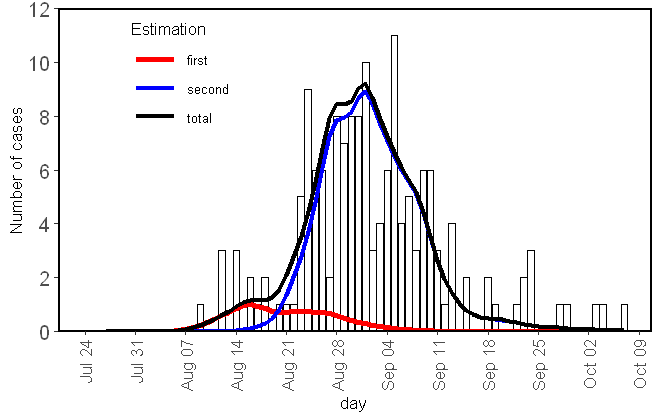

In [20]:
fig_gen  =ggplot(esti_case_rt%>%dplyr::select(Obs,date),mapping=aes(x=date,y=Obs)) +
  geom_bar(stat="identity",fill="white",position='dodge',colour="black")+
  geom_line(esti_case_rt_bygen,mapping=aes(x=date,y=n, color=Epicurve,size=Epicurve))+
  scale_color_manual(name ="Estimation",values=c("red","blue","black"),labels=c("first","second","total"))+
  scale_size_manual(name ="Estimation",values=c(1.5,1.2,1.3),labels=c("first","second","total"))+
  coord_x_date(xlim=c(esti_case_rt$date[1]-3,esti_case_rt$date[nrow(esti_case_rt)]),ylim=c(0,12))+
   ylab("Number of cases") + xlab("day") +
  scale_y_continuous(expand = c(0, 0),breaks=seq(0,12,by=2))+  
  scale_x_date(date_breaks="7 day",date_labels="%b %d")+
  theme_bw(base_size=10)+theme(axis.text.x=element_text(size=10,angle = 90, vjust=0.5,hjust = 1),axis.text.y=element_text(size=12),axis.title=element_text(size=10),
                               plot.title = element_text(size = 12,face="bold"),
                               legend.background = element_rect(fill="transparent"), 
                               panel.grid= element_blank(),
                               legend.text=element_text(size=8),
                               legend.position = c(0.3,0.99),
                               legend.key.width = unit(2, "line"),
                               panel.border = element_rect(colour = "black", fill=NA, size=1),
                               legend.justification = c("right", "top"))
fig_gen

# Figure 4

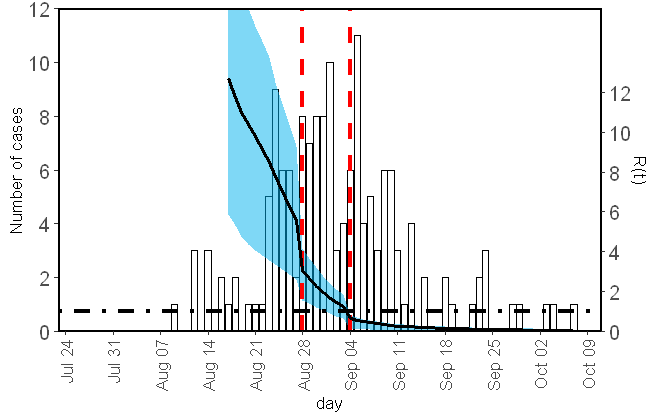

In [21]:
 fig_Rt = ggplot(esti_case_rt%>%dplyr::select(Obs,date),mapping=aes(x=date,y=Obs)) +
    geom_bar(stat="identity",fill="white",position='dodge',colour="black")+
    geom_ribbon(esti_case_rt%>%filter(Rt>0),mapping=aes(ymin=lower/1.35,ymax=upper/1.35), alpha=0.5,fill="deepskyblue2")+
     coord_x_date(ylim=c(0,12))+
    ylab("Number of cases") + xlab("day") +
    scale_x_date(date_breaks="7 day",date_labels="%b %d")+
    scale_y_continuous(expand = c(0, 0),breaks=seq(0,12,by=2),sec.axis = sec_axis(~1.35*.,name="R(t)",breaks=seq(0,12,2)))+
    geom_vline(xintercept = as.Date(c(Tdate[1],Tdate[2])),color="red",size=1.2,linetype="dashed") +
    geom_hline(yintercept = 1/1.35, size=1.2,color="black",linetype="dotdash") +
 geom_line(esti_case_rt%>%filter(Rt>0),mapping=aes(x=date,y=Rt/1.35),color="black",linetype="solid",size=1.0) +
    
theme_bw(base_size=10)+theme(axis.text.x=element_text(size=10,angle = 90, vjust=0.5,hjust = 1),axis.text.y=element_text(size=12),axis.title=element_text(size=10),
                                 plot.title = element_text(size = 12,face="bold"),
                                 legend.background = element_rect(fill="transparent"),
                                 panel.grid= element_blank(),
                                 legend.text=element_text(size=10),
                                 legend.position = c(0.95,0.99),
                                 panel.border = element_rect(colour = "black", fill=NA, size=1),
                                 legend.justification = c("right", "top"))
fig_Rt